## Logistic Regression for predicting weather

### Problem Statement
- Classification Model to predict whether it rains tomorrow. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape

(142193, 24)

In [5]:
cols = df.columns
cols

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
df.drop(['RISK_MM'], axis=1, inplace=True)

### Exploratory Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [16]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
print("Categorical variables are: ",categorical)

# for i in col:
#     if df[i].dtype == 'O':
#         return i

Categorical variables are:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Insights

- There are 7 categorical variables.
- We can change Date variable to Date format.
- Target variable is Rain Tomorrow because it is binary categorical variable.

In [21]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [23]:
for i in categorical:
    print(df[i].value_counts())

Date
2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith  

In [12]:
for i in categorical:
    print(i, 'contains', len(df[i].unique()), 'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 2 labels


In [25]:
data = df.copy()
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [27]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [29]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
#data = data.apply(lambda x:x.fillna(x.mean()) if x.dtype =='float' else x.fillna(x.mode()[0]))

In [31]:
#data.WindGustDir.value_counts()

WindGustDir
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: count, dtype: int64

In [33]:
#data.WindGustDir.value_counts().index[0]

'W'

In [35]:
#data.WindGustDir.mode()

0    W
Name: WindGustDir, dtype: object

Date variable contains more labels and it will be an issue for the model to have more features. So we pre process it.

In [14]:
df['Date'].dtype

dtype('O')

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['Date'].dtype

dtype('<M8[ns]')

In [17]:
df['Year'] = df['Date'].dt.year

In [18]:
df['Month'] = df['Date'].dt.month

In [19]:
df['Day'] = df['Date'].dt.day

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [21]:
df.drop(['Date'], inplace = True, axis = 1)

In [22]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


We converted Date column to Year, Month, Day and removed Date.

In [24]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
print("Categorical variables are: ",categorical)

Categorical variables are:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [25]:
df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [26]:
for i in categorical:
    print(i, 'contains', len(df[i].unique()), 'labels')

Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 2 labels


In [27]:
#df.Location.value_counts()

In [28]:
pd.get_dummies(df.Location, drop_first=True, dtype='int').head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
pd.get_dummies(df.WindGustDir, drop_first=True,dtype='int', dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
pd.get_dummies(df.WindDir9am, drop_first=True,dtype='int', dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
pd.get_dummies(df.WindDir3pm, drop_first=True,dtype='int', dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [33]:
pd.get_dummies(df.RainToday, drop_first=True,dtype='int', dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [34]:
df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [35]:
numerical = [i for i in df.columns if df[i].dtype != 'O']
print("Numerical variables are: ", numerical)

Numerical variables are:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [36]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


Insights

- There are 16 numerical variables
- All are continuous

#### Missing Values treatment

In [37]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [38]:
round(df[numerical].describe() ,2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,141556.00,141871.00,140787.00,81350.00,74377.00,132923.00,140845.00,139563.00,140419.00,138583.00,128179.00,128212.00,88536.00,85099.00,141289.00,139467.00,142193.00,142193.00,142193.00
mean,12.19,23.23,2.35,5.47,7.62,39.98,14.00,18.64,68.84,51.48,1017.65,1015.26,4.44,4.50,16.99,21.69,2012.76,6.40,15.72
std,6.40,7.12,8.47,4.19,3.78,13.59,8.89,8.80,19.05,20.80,7.11,7.04,2.89,2.72,6.49,6.94,2.54,3.43,8.80
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,2007.00,1.00,1.00
25%,7.60,17.90,0.00,2.60,4.90,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60,2011.00,3.00,8.00
50%,12.00,22.60,0.00,4.80,8.50,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,2013.00,6.00,16.00
75%,16.80,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40,2015.00,9.00,23.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,2017.00,12.00,31.00


Text(0, 0.5, 'WindSpeed3pm')

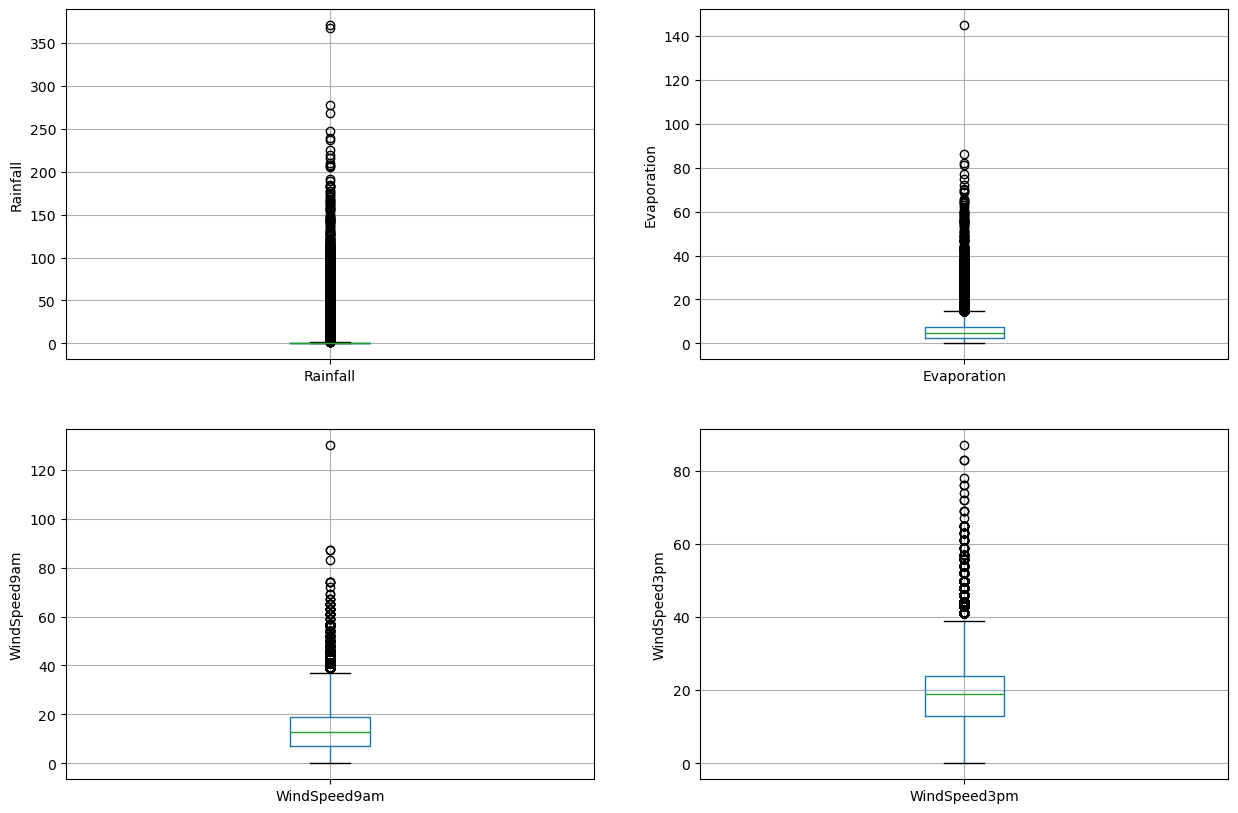

In [39]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_ylabel('WindSpeed3pm')


all of them have outliers and I will check with histplot whether they are skewed. 

Text(0, 0.5, 'RainTomorrow')

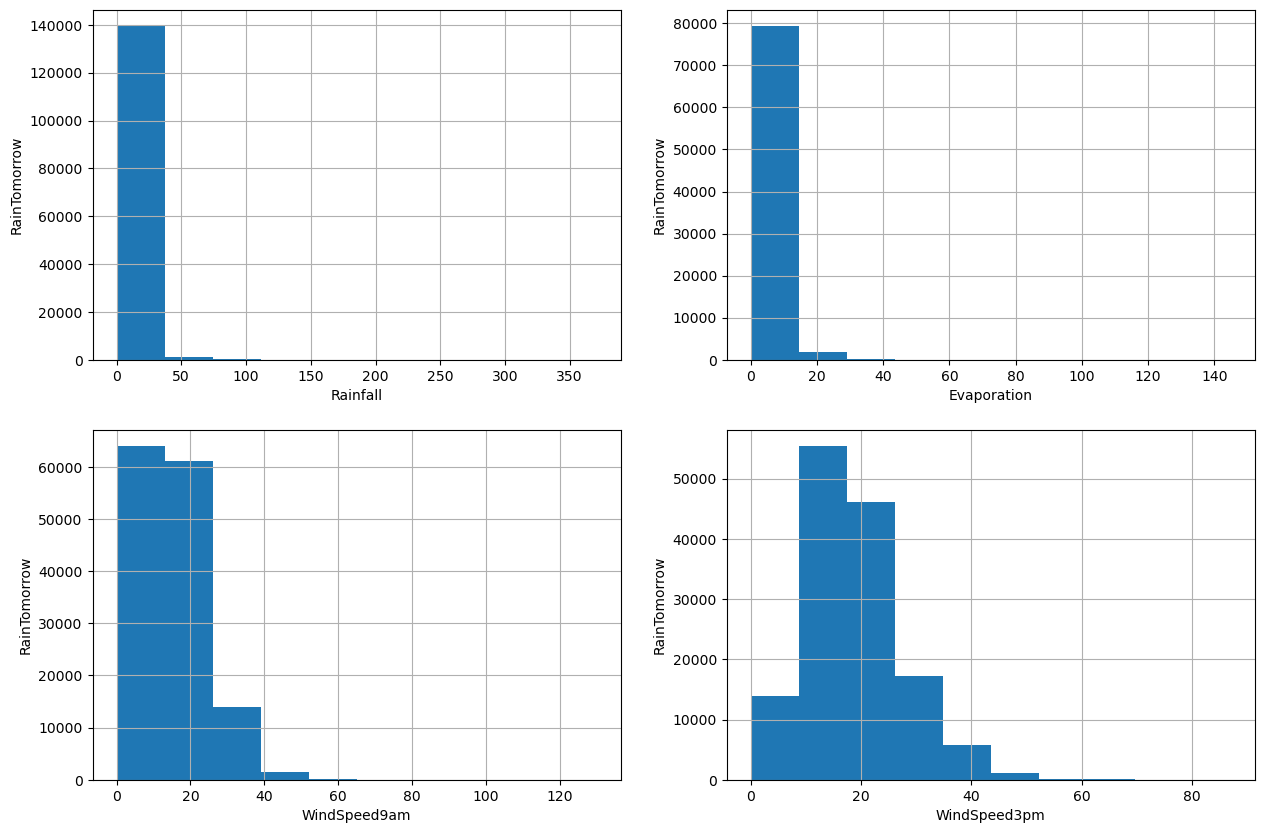

In [41]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

From the Histograms it is clear that all are skewed and Median imputation can be used to fill missing values

In [85]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [87]:
#Fill missing values with median

In [89]:
for col in numerical:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Navaneeth\AppData\Local\Temp\ipykernel_2128\2714759758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [91]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [95]:
df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [97]:
for col in categorical:
    if df[col].isnull().sum() != 0:
        df[col].fillna(df[col].mode()[0], inplace = True)

C:\Users\Navaneeth\AppData\Local\Temp\ipykernel_2128\2634750796.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)


In [99]:
df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [103]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

In [107]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977,2012.758926,6.402544,15.715084
std,6.388936,7.109617,8.426426,3.185401,2.769638,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


#### Outlier Analysis

Outlier Treatment

In [135]:
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    return filtered_data

# Detect and remove outliers
filtered_numerical = remove_outliers_zscore(df[numerical])
filtered_categorical = df.loc[filtered_numerical.index, categorical]

filtered_data = pd.concat([filtered_numerical, filtered_categorical], axis = 1)

<IPython.core.display.Javascript object>

In [139]:
filtered_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Year,Month,Day,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,21.8,2008,12,1,Albury,W,W,WNW,No,No
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,24.3,2008,12,2,Albury,WNW,NNW,WSW,No,No
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,23.2,2008,12,3,Albury,WSW,W,WSW,No,No
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,26.5,2008,12,4,Albury,NE,SE,E,No,No
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,29.7,2008,12,5,Albury,W,ENE,NW,No,No


In [141]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133488 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        133488 non-null  float64
 1   MaxTemp        133488 non-null  float64
 2   Rainfall       133488 non-null  float64
 3   Evaporation    133488 non-null  float64
 4   Sunshine       133488 non-null  float64
 5   WindGustSpeed  133488 non-null  float64
 6   WindSpeed9am   133488 non-null  float64
 7   WindSpeed3pm   133488 non-null  float64
 8   Humidity9am    133488 non-null  float64
 9   Humidity3pm    133488 non-null  float64
 10  Pressure9am    133488 non-null  float64
 11  Pressure3pm    133488 non-null  float64
 12  Cloud9am       133488 non-null  float64
 13  Cloud3pm       133488 non-null  float64
 14  Temp9am        133488 non-null  float64
 15  Temp3pm        133488 non-null  float64
 16  Year           133488 non-null  int32  
 17  Month          133488 non-null  in

In [143]:
filtered_data.RainToday.value_counts()

RainToday
No     106157
Yes     27331
Name: count, dtype: int64

In [145]:
filtered_data.RainTomorrow.value_counts()

RainTomorrow
No     105347
Yes     28141
Name: count, dtype: int64

In [147]:
filtered_data['RainToday'] = filtered_data['RainToday'].replace({'No':0, 'Yes': 1})
filtered_data['RainTomorrow'] = filtered_data['RainTomorrow'].replace({'No': 0, 'Yes': 1})

C:\Users\Navaneeth\AppData\Local\Temp\ipykernel_2128\2896012244.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_data['RainToday'] = filtered_data['RainToday'].replace({'No':0, 'Yes': 1})
C:\Users\Navaneeth\AppData\Local\Temp\ipykernel_2128\2896012244.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_data['RainTomorrow'] = filtered_data['RainTomorrow'].replace({'No': 0, 'Yes': 1})


In [151]:
filtered_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Year,Month,Day,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,21.8,2008,12,1,Albury,W,W,WNW,0,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,24.3,2008,12,2,Albury,WNW,NNW,WSW,0,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,23.2,2008,12,3,Albury,WSW,W,WSW,0,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,26.5,2008,12,4,Albury,NE,SE,E,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,29.7,2008,12,5,Albury,W,ENE,NW,0,0


In [153]:
categorical = [i for i in filtered_data.columns if filtered_data[i].dtype == 'O']

In [155]:
final_data = pd.get_dummies(filtered_data, columns = categorical, dtype='int', drop_first=True)

In [159]:
final_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [161]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133488 entries, 0 to 142192
Columns: 114 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(16), int32(96), int64(2)
memory usage: 68.2 MB


### Train Test Split

In [169]:
data = final_data.copy()

In [173]:
X = data.drop(['RainTomorrow'], axis = 1)
y = data['RainTomorrow']

In [175]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify = y)

In [179]:
X_train.shape

(106790, 113)

In [181]:
X_test.shape

(26698, 113)

In [184]:
y_train.value_counts(normalize=True)

RainTomorrow
0    0.789184
1    0.210816
Name: proportion, dtype: float64

In [186]:
y_test.value_counts(normalize=True)

RainTomorrow
0    0.789198
1    0.210802
Name: proportion, dtype: float64

#### MinMaxScaler Standardization

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
cols = X_train.columns

In [192]:
scaler = MinMaxScaler()

In [204]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

In [212]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,...,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000,106790.000000
mean,0.499064,0.498768,0.052452,0.335983,0.556633,0.455726,0.344037,0.413071,0.645149,0.508714,...,0.054471,0.058123,0.067141,0.101863,0.063920,0.056466,0.065034,0.067834,0.059931,0.065559
std,0.166401,0.161385,0.138956,0.158943,0.188518,0.163447,0.209300,0.185882,0.209928,0.201058,...,0.226947,0.233978,0.250267,0.302470,0.244611,0.230820,0.246587,0.251462,0.237360,0.247510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379947,0.377934,0.000000,0.272109,0.572414,0.347222,0.179487,0.295455,0.517241,0.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.493404,0.485915,0.000000,0.326531,0.586207,0.458333,0.333333,0.386364,0.655172,0.515152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617414,0.612676,0.018116,0.353741,0.606897,0.555556,0.487179,0.545455,0.804598,0.646465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,...,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000,26698.000000
mean,0.504108,0.502057,0.052803,0.339536,0.564890,0.447446,0.343451,0.413699,0.647598,0.511651,...,0.053974,0.056896,0.068132,0.105401,0.064537,0.054873,0.063975,0.068470,0.058806,0.062214
std,0.169889,0.162715,0.138719,0.161003,0.189036,0.162954,0.209179,0.184845,0.208291,0.201695,...,0.225971,0.231647,0.251978,0.307075,0.245711,0.227737,0.244713,0.252555,0.235265,0.241549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.381333,0.379717,0.000000,0.273973,0.587413,0.338028,0.179487,0.295455,0.517241,0.373737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.498667,0.488208,0.000000,0.328767,0.594406,0.450704,0.333333,0.431818,0.655172,0.515152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.629333,0.617925,0.021739,0.342466,0.608392,0.549296,0.487179,0.545455,0.804598,0.646465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Evaluation

In [216]:
from sklearn.linear_model import LogisticRegression

In [218]:
lr = LogisticRegression()

In [220]:
lr.fit(X_train, y_train)

LogisticRegression()

In [222]:
ypred_test = lr.predict(X_test)

In [224]:
prob_positive = lr.predict_proba(X_test)[:, 1]

In [226]:
prob_negative = lr.predict_proba(X_test)[:, 0]

In [228]:
print("Probability of Rain: ", prob_positive)
print("Probability of No Rain: ", prob_negative)

Probability of Rain:  [0.5489661  0.02256716 0.04537113 ... 0.88175471 0.14088963 0.92214545]
Probability of No Rain:  [0.4510339  0.97743284 0.95462887 ... 0.11824529 0.85911037 0.07785455]


In [232]:
from sklearn.metrics import *

In [234]:
print("Model Accuracy score: ", accuracy_score(y_test, ypred_test))

Model Accuracy score:  0.8482283317102405


In [236]:
ypred_train = lr.predict(X_train)

In [238]:
print("Model Accuracy score: ", accuracy_score(y_train, ypred_train))

Model Accuracy score:  0.8516059556138215


In [242]:
print("Training dataset score: ", lr.score(X_train, y_train))
print("Test dataset score: ", lr.score(X_test, y_test))

Training dataset score:  0.8516059556138215
Test dataset score:  0.8482283317102405


Insights

- Model shows no signs for Overfitting as both accuracy scores are almost equal

In [244]:
cm = confusion_matrix(y_test, ypred_test)

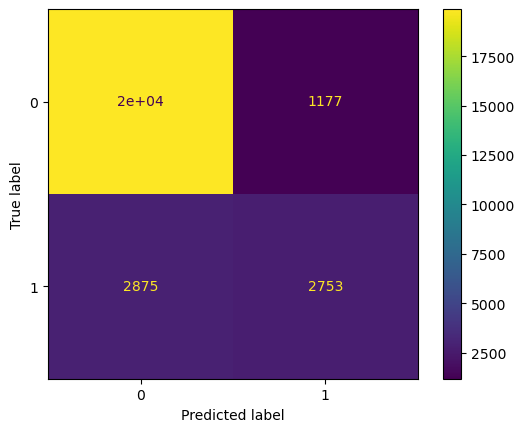

In [246]:
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

In [248]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     21070
           1       0.70      0.49      0.58      5628

    accuracy                           0.85     26698
   macro avg       0.79      0.72      0.74     26698
weighted avg       0.84      0.85      0.84     26698



In [280]:
print(classification_report(y_train, ypred_train))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     84277
           1       0.72      0.48      0.58     22513

    accuracy                           0.85    106790
   macro avg       0.80      0.72      0.74    106790
weighted avg       0.84      0.85      0.84    106790



In [250]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [254]:
classification_accuracy = (TP+TN)/(TP+TN+FP+FN)
classification_accuracy

0.8482283317102405

In [256]:
classification_error = (FP+FN)/(TP+TN+FP+FN)

In [258]:
classification_error

0.15177166828975952

In [260]:
precision = TP/(TP+FP)

In [262]:
precision

0.9441385856668248

In [264]:
recall = TP/(TP+FN)
recall

0.8737262825017569

(0.0, 1.0)

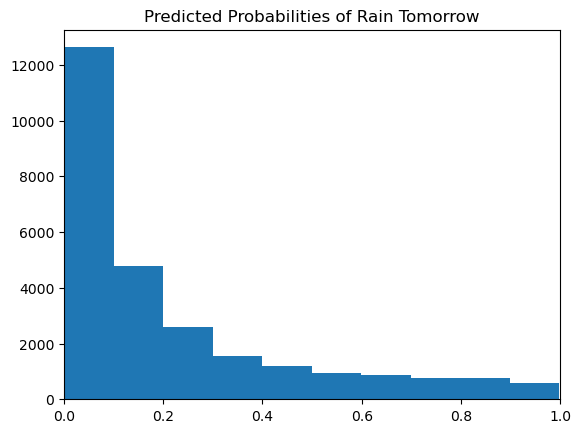

In [272]:
plt.hist(prob_positive, bins = 10)
plt.title('Predicted Probabilities of Rain Tomorrow')
plt.xlim(0,1)

Insights

- Probability of rain which is greater than 0.5 is less. As the histogram is right skewed and there are no.of bins are decreasing towards 1
- Small number of observations preddicting there is rain tomorrow

#### ROC Curve metrics

In [274]:
fpr,tpr,threshold = roc_curve(y_test, prob_positive)

In [276]:
roc_auc_score(y_test,prob_positive)

0.8600026766297337

Text(0.5, 1.0, 'Receiver Operating Characteristics(ROC) Curve')

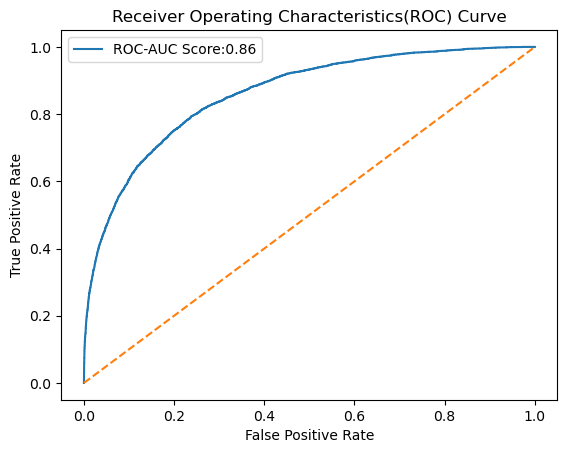

In [278]:
plt.plot(fpr,tpr, label = f'ROC-AUC Score:{round(roc_auc_score(y_test,prob_positive),3)}')
plt.plot([0,1],[0,1],ls='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics(ROC) Curve")

Insights

- ROC Curve value is 0.86 which is near to 1.0 so we can say our model performance is good in predicting whether there will be rain tomorrow or not.
- From the model evaluation it is shown that model is performing good and can predict weather with 85% accuracy.